In [3]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [4]:
tweet= pd.read_csv("C:\\Users\\shkatta\\Desktop\\AI\\csv files\\twitter.csv")
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
tweet.shape

(3339, 12)

Text(0, 0.5, 'No. of Tweets')

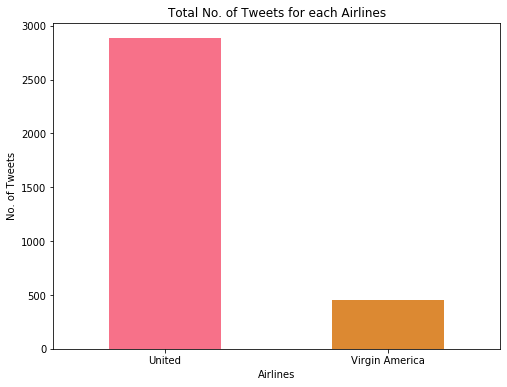

In [6]:
colors=sns.color_palette("husl", 10) 
pd.Series(tweet["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

Text(0, 0.5, 'No. of Tweets')

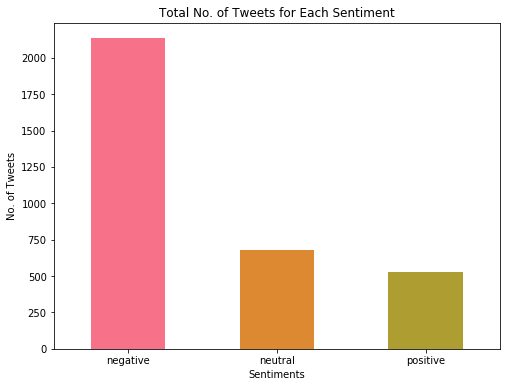

In [7]:
#Plotting the number of each type of sentiments 
colors=sns.color_palette("husl", 10)
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

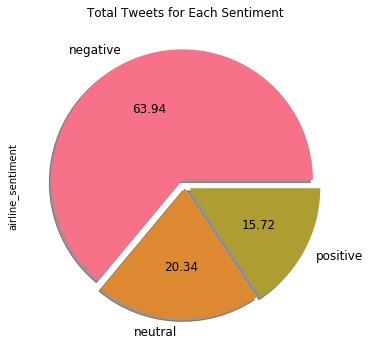

In [8]:
colors=sns.color_palette("husl", 10)
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

In [9]:
 tweet.negativereason.value_counts()

Customer Service Issue         563
Late Flight                    412
Can't Tell                     304
Lost Luggage                   207
Bad Flight                     177
Cancelled Flight               158
Flight Attendant Complaints    132
Flight Booking Problems        121
longlines                       42
Damaged Luggage                 18
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

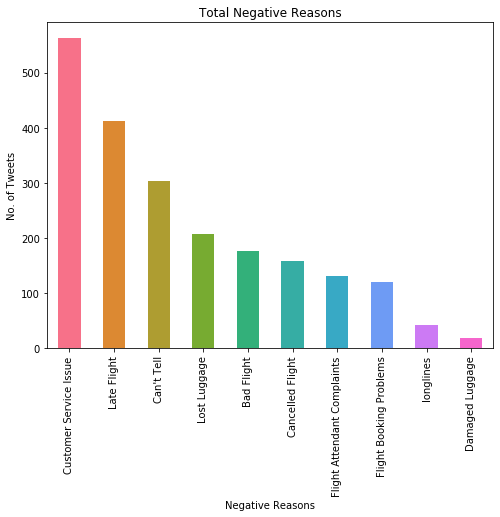

In [10]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(tweet["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [11]:
air_senti=pd.crosstab(tweet.airline, tweet.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
United,1969,531,384
Virgin America,165,148,141


In [12]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
United,68.273232,18.411928,13.314840
Virgin America,36.343612,32.599119,31.057269


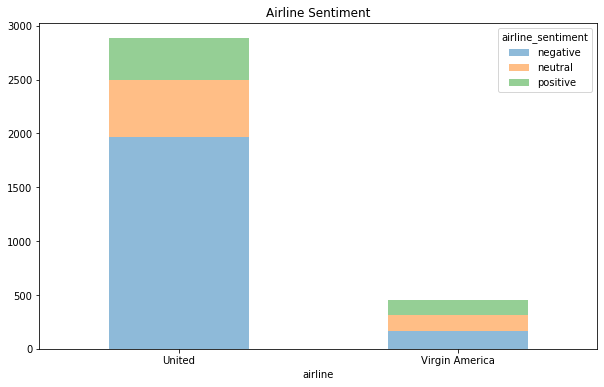

In [13]:
pd.crosstab(index = tweet["airline"],columns = tweet["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")


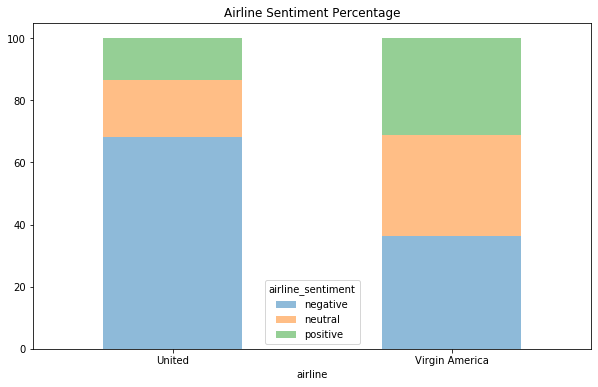

In [14]:
percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

In [21]:
tweet['tweet_created']=pd.Series(tweet['tweet_created'])
tweet['tweet_created']

0       2015-02-24 11:35:52 -0800
1       2015-02-24 11:15:59 -0800
2       2015-02-24 11:15:48 -0800
3       2015-02-24 11:15:36 -0800
4       2015-02-24 11:14:45 -0800
5       2015-02-24 11:14:33 -0800
6       2015-02-24 11:13:57 -0800
7       2015-02-24 11:11:19 -0800
8       2015-02-24 10:53:27 -0800
9                             NaN
10                              p
11      2015-02-24 10:15:29 -0800
12      2015-02-24 10:01:50 -0800
13      2015-02-24 09:42:59 -0800
14      2015-02-24 09:15:00 -0800
15      2015-02-24 09:04:10 -0800
16      2015-02-24 08:55:56 -0800
17      2015-02-24 08:49:01 -0800
18      2015-02-24 08:30:15 -0800
19                            NaN
20      2015-02-24 08:18:51 -0800
21      2015-02-24 07:49:15 -0800
22      2015-02-24 07:11:37 -0800
23      2015-02-24 05:44:59 -0800
24      2015-02-24 05:05:28 -0800
25      2015-02-23 23:34:30 -0800
26      2015-02-23 22:52:29 -0800
27      2015-02-23 21:35:43 -0800
28      2015-02-23 21:10:41 -0800
29      2015-0

In [33]:
#visualization using wordcloud for the negative tweets
df=tweet[tweet['airline_sentiment']=='negative']
df['text'][:8]

3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
12        @VirginAmerica SFO-PDX schedule is still MIA.
16    @VirginAmerica why are your first fares in May...
20    @VirginAmerica you guys messed up my seating.....
21    @VirginAmerica status match program.  I applie...
22    @VirginAmerica What happened 2 ur vegan food o...
Name: text, dtype: object

In [41]:
words=df['text']
words=str(words)
words=''.join(words)
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [42]:
cleaned_word

"3 it's really aggressive to blast... 4 and it's a really big bad thing... 5 seriously would pay $30 a fligh... 12 SFO-PDX schedule is still MIA. 16 why are your first fares in May... 20 you guys messed up my seating..... 21 status match program. I applie... 22 What happened 2 ur vegan food o... 24 amazing to me that we can't get... 26 hi! I just bked a cool birthday... 28 help, left expensive headphones... 29 awaiting my return phone call, ... 35 Your chat support is not workin... 37 Hey, first time flyer next week... 50 hi! i'm so excited about your $... 54 I called a 3-4 weeks ago about ... 59 heyyyy guyyyys.. been trying to... 60 Hi, Virgin! I'm on hold for 40-... 62 everything was fine until you l... 66 your airline is awesome but you... 70 what is going on with customer ... 72 why can't you supp the biz trav... 74 you're the best!! Whenever I (b... 75 I have no interesting flying wi... 76 it was a disappointing experien... 82 I like the TV and interesting v... 83 just landed in L